In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit,train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


In [29]:
train = pd.read_csv('train.csv')

In [30]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [31]:
numeric_data = train.select_dtypes(include=[np.number])
numeric_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


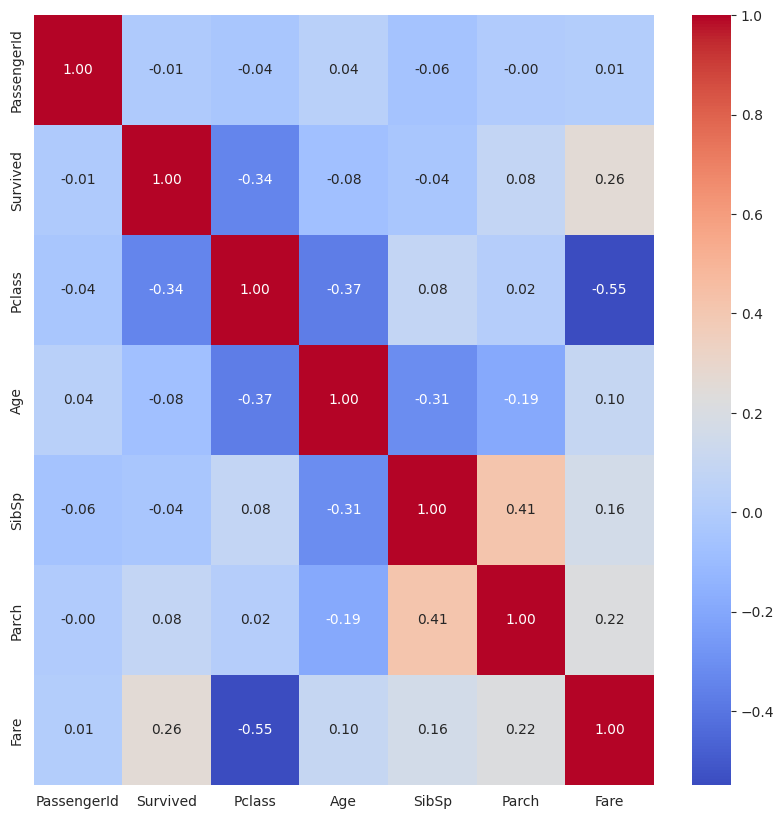

In [32]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
corr_matrix = numeric_data.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

In [33]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [34]:
#since there is alot of null cabins and ages we drop the cabin and fill the age with the median
train.drop(columns='Cabin',axis=1,inplace=True)

In [35]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [36]:
train.Age = train['Age'].fillna(train['Age'].median())

In [37]:
#There are two Embarked missing values, we will fill them with the most common value
train['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [38]:
train.Embarked = train['Embarked'].fillna('S')

In [39]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [40]:
train.shape

(891, 11)

In [41]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: xlabel='Survived', ylabel='count'>

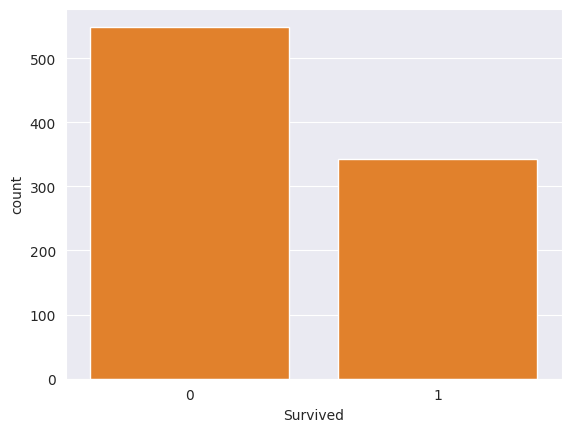

In [42]:
sns.histplot()
sns.countplot(x='Survived',data= train)

<Axes: xlabel='Pclass', ylabel='count'>

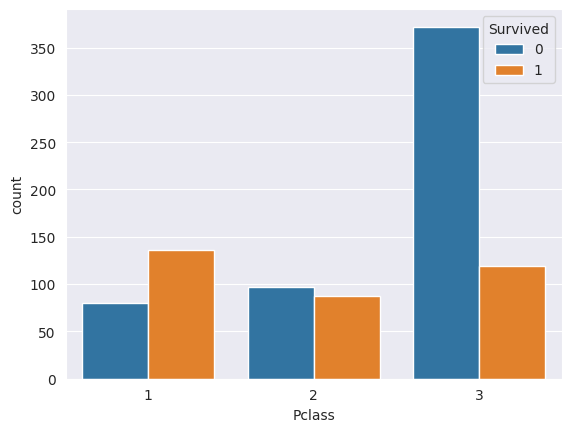

In [43]:
sns.countplot(x='Pclass',hue='Survived',data=train)

<Axes: xlabel='Sex', ylabel='count'>

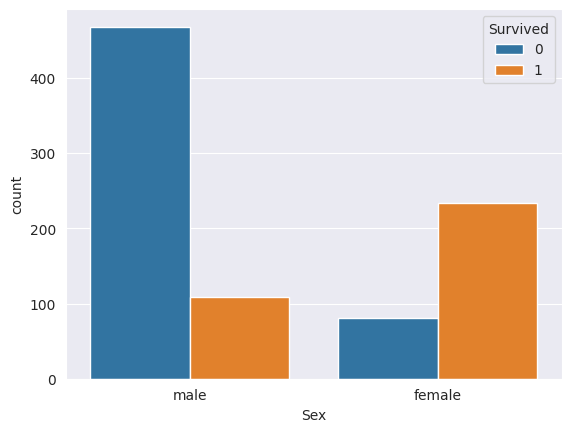

In [44]:
sns.countplot(x='Sex',hue='Survived',data = train)

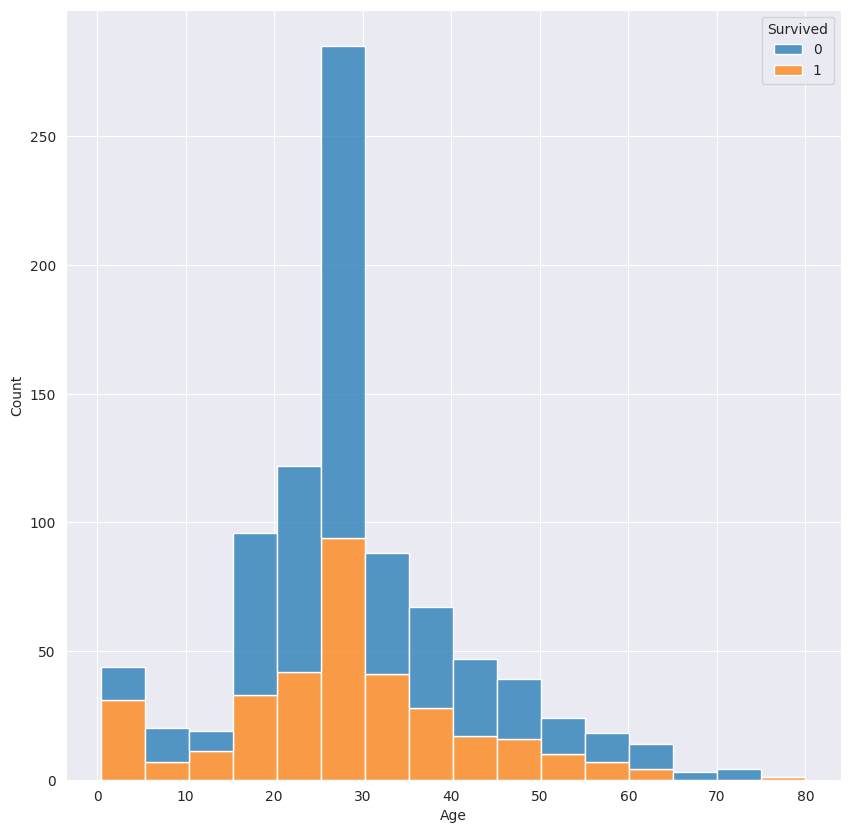

In [45]:

plt.figure(figsize=(10,10))
sns.histplot(data=train, x='Age', hue='Survived', multiple="stack", binwidth=5)
plt.show()

In [46]:
train = train.replace({'Sex':{'male':0, 'female':1}, 'Embarked':{'S':0, 'C':1, 'Q':2}})
x_numeric = train.drop(['PassengerId','Name','Ticket','Survived'],axis=1)
pd.set_option('future.no_silent_downcasting', True)


In [47]:
y_numeric = train['Survived']

In [48]:
x_train,x_test,y_train,y_test= train_test_split(x_numeric,y_numeric,test_size=0.2,random_state=2)

In [49]:
mdl = LogisticRegression(max_iter=1000)
mdl.fit(x_train,y_train)    

LogisticRegression(max_iter=1000)

In [50]:
prediction = mdl.predict(x_test)
accuracy_score(prediction,y_test)

0.7821229050279329

In [51]:
confusion_matrix(y_test,prediction)

array([[91,  9],
       [30, 49]])

In [52]:
res_stats=pd.DataFrame(classification_report(y_test,prediction,output_dict=True))

In [53]:
res_stats

,0,1,accuracy,macro avg,weighted avg
precision,0.752066,0.844828,0.782123,0.798447,0.793006
recall,0.910000,0.620253,0.782123,0.765127,0.782123
f1-score,0.823529,0.715328,0.782123,0.769429,0.775776
support,100.000000,79.000000,0.782123,179.000000,179.000000
